In [1]:
import sys
sys.path.insert(0, '..')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import dataframe_manip as hp
import pytz
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [2]:
data = hp.csv_to_timeseries_df(filepath='../wifi_data_until_20190204.csv', timezone=pytz.timezone('US/Pacific'))

In [13]:
temp = hp.get_hourly_data_building(data, 'FRANK')
temp['y'] = temp.sum(axis=1)
temp = temp['y']
temp = pd.DataFrame(temp).reset_index()
temp.columns = ['ds', 'y']
temp['ds'] = temp['ds'].astype(str).str[:-9]

In [14]:
for i, row in temp.iterrows():
    datetime = dt.strptime(temp.at[i, 'ds'], '%Y-%m-%d %H:%M')
    temp.at[i,'weekday'] = datetime.weekday()
    temp.at[i, 'month'] = datetime.month
    temp.at[i, 'day'] = datetime.day
    temp.at[i, 'hour'] = datetime.hour

In [15]:
y = temp['y']
x = temp.loc[:, 'weekday':'hour']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False) # 70% training and 30% test

In [17]:
forest = RandomForestRegressor(200)
forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
yfit = forest.predict(x_test)

In [19]:
what_train, what_test = train_test_split(temp, test_size=0.3, shuffle=False)
print(what_test)

                    ds           y  weekday  month  day  hour
3374  2018-12-06 13:00    7.750000      3.0   12.0  6.0  13.0
3375  2018-12-06 14:00    4.500000      3.0   12.0  6.0  14.0
3376  2018-12-06 15:00    5.250000      3.0   12.0  6.0  15.0
3377  2018-12-06 16:00    9.916667      3.0   12.0  6.0  16.0
3378  2018-12-06 17:00   71.166667      3.0   12.0  6.0  17.0
3379  2018-12-06 18:00  117.750000      3.0   12.0  6.0  18.0
3380  2018-12-06 19:00   92.083333      3.0   12.0  6.0  19.0
3381  2018-12-06 20:00   61.250000      3.0   12.0  6.0  20.0
3382  2018-12-06 21:00  198.750000      3.0   12.0  6.0  21.0
3383  2018-12-06 22:00  132.500000      3.0   12.0  6.0  22.0
3384  2018-12-06 23:00   81.916667      3.0   12.0  6.0  23.0
3385  2018-12-07 00:00   62.166667      4.0   12.0  7.0   0.0
3386  2018-12-07 01:00   48.000000      4.0   12.0  7.0   1.0
3387  2018-12-07 02:00  139.750000      4.0   12.0  7.0   2.0
3388  2018-12-07 03:00  220.500000      4.0   12.0  7.0   3.0
3389  20

In [20]:
print(yfit)

[5.92541667 4.44333333 4.525      ... 0.         0.         0.        ]


In [21]:
holder = pd.DataFrame()
holder['ds'] = what_test['ds']
holder['y'] = what_test['y']
print(holder)

                    ds           y
3374  2018-12-06 13:00    7.750000
3375  2018-12-06 14:00    4.500000
3376  2018-12-06 15:00    5.250000
3377  2018-12-06 16:00    9.916667
3378  2018-12-06 17:00   71.166667
3379  2018-12-06 18:00  117.750000
3380  2018-12-06 19:00   92.083333
3381  2018-12-06 20:00   61.250000
3382  2018-12-06 21:00  198.750000
3383  2018-12-06 22:00  132.500000
3384  2018-12-06 23:00   81.916667
3385  2018-12-07 00:00   62.166667
3386  2018-12-07 01:00   48.000000
3387  2018-12-07 02:00  139.750000
3388  2018-12-07 03:00  220.500000
3389  2018-12-07 04:00  143.500000
3390  2018-12-07 05:00  105.916667
3391  2018-12-07 06:00   94.333333
3392  2018-12-07 07:00   59.083333
3393  2018-12-07 08:00   31.333333
3394  2018-12-07 09:00   25.750000
3395  2018-12-07 10:00   18.166667
3396  2018-12-07 11:00    6.916667
3397  2018-12-07 12:00    3.666667
3398  2018-12-07 13:00    1.416667
3399  2018-12-07 14:00    2.000000
3400  2018-12-07 15:00    3.000000
3401  2018-12-07 16:

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


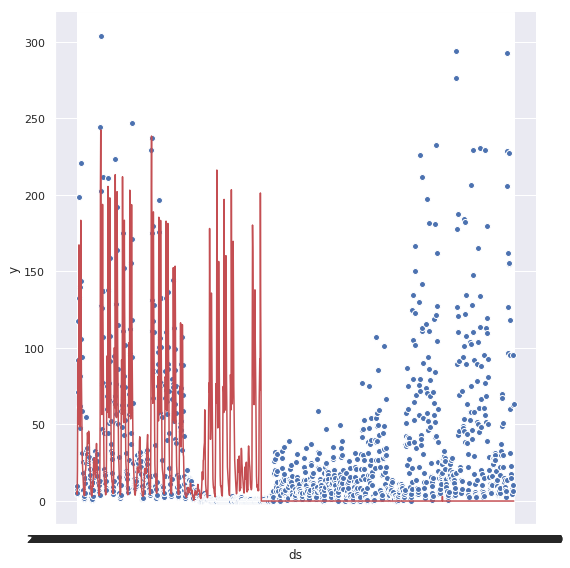

In [25]:
g = sns.FacetGrid(holder, size = 8)
g = g.map(plt.scatter, "ds", "y", edgecolor="w")
plt.plot(holder['ds'], yfit, color='r')
plt.show()